<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_3_Monetary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Προετοιμασία δεδομένων

In [1]:
import yfinance as yf
import plotly.express as px
import pandas as pd
import numpy as np

ticker_sympol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_sympol)
df_general = ticker.history(period="5y").reset_index(drop=False)
df_general.drop(columns=['Volume', "Dividends", "Stock Splits"], inplace=True) # no need to feel any gap, the dataset is full of data per attribute

# Ερώτημα 1

In [2]:
data_to_visualize = px.data.gapminder().query("country=='USA'")
fig = px.line(df_general, x="Date", y=["Open", "High", "Low", "Close"], title='US Dollar timeseries for the past 5 years')
fig.show()

# Ερώτημα 2

Αρχικά θα έλεγα πως δεν είναι στατικές οι χρονοσειρές (σε μακρό-view μπορεί κάποιος να πει ότι υπάρχει μια σχετική στασιμότητα μεταξύ Jan 2023 και Jul 2024).

Πιο ειδικά, υπάρχει ανοδική τάση μεταξύ 2021 και τέλη 2022 και πτωτική τάση από το Jan 2025 μδχρι και τον Αύγουστο του 2025.

Στο υπόλοιπο διάστημα, υπάρχουν πολλές αυξομειώσεις. Εννοείται ότι λόγω της μη σταθερότητας, η διακύμανση δεν είναι σταθερή.

Άρα, τα attributes έχουν μη-στατικές χρονοσειρές.

# Ερώτημα 3

[1] Πιστεύω πως η χρήση ενός Regressor σε μη στατικές χρονοσειρές μπορεί να οδηγήσει σε overfitting γιατί θεωρεί πως το trend του γραφήματος είναι πανάκεια, κάνοντας αντίστοιχες προβλέψεις (κάτι που δεν ισχύει, καθώς μπορεί στα προηγούμενα 5 χρόνια να είχα ακόμα και ακριβώς το αντίθετο γράφημα).

[2] Επίσης, μαζί με το παραπάνω πάει και η μη σταθερή διακύμανση. Αυτό θα σήμαινε πως οι συγκεκριμένες χρονοσειρές έχουν μεγάλο "θόρυβο". Όταν έχουμε "θόρυβο" είναι πολύ δύσκολο ένα μοντέλο να κάνει σωστές προβλέψεις.

[3] Τελευταίο, πιστεύω πως υπάρχει πολύ μεγάλη αυτοσυσχέτιση κάτι που θα δυσκολέψει την εκπαίδευση του μοντέλου καθώς θα είναι δύσκολο να επιλεχθεί κατάλληλο πακέτο δεδομένων προς έλεγχο (μετά την εκπαίδευση) που δε θα έχει ήδη χρησιμοποιηθεί (έμμεσα ενισχύει και το overfitting).

# Ερώτημα 4

[1] Μία πιθανή θεωρία είναι πως υπήρξε μείωση του δολαρίου προς τα τέλη του Ιουνίου καθώς στις 24 του μήνα, η Αμερική συνδράμει στην επίτευξη ειρήνης μεταξύ του Ιράν και του Ισραήλ. Επομένως, εφόσον βγήκαμε από την επικίνδυνη κατάσταση που ήταν ο πιθανός πόλεμος, οι επενδυτές απέσυραν τις επενδύσεις τους απο το Αμερικάνικο δολάριο, για αυτό και υπήρξε αυτή η πτώση (το Αμερικάνικο δολάριο θεωρείται παγκοσμίως ως ένα από τα πιο ασφαλή κεφάλαια, και προτιμάται σε έκρυθμες καταστάσεις).
**Source**: https://www.reuters.com/world/africa/dollar-falls-broad-risk-rally-after-trump-announces-israel-iran-ceasefire-2025-06-24/

[2] Η FED στην Αμερική υπήρχε περίπτωση να μειώσει τα επιτόκια, κάτι που θα έδινε ώθηση στην Αμερικάνικη αγορά. Τελικά αυτό δεν έγινε, όμως παρότι υπήρχε παγκόσμια γενικευμένη αστάθεια, ο Jerome Powell (Chair της FED) παρόλο την αστάθεια δε τα μείωσε κάτι που έδειξε στους επενδυτές πως η Αμερική μπορεί να σταθεί ενάντια σε αυτή την κατάσταση. Η εμπιστοσύνη αυτή φάνηκε με την επένδυση στο Αμερικάνικο δολάριο.
**Source**: https://www.reuters.com/world/africa/dollar-set-first-monthly-gain-2025-trade-deals-ease-uncertainty-2025-07-31/

# Ερώτημα 5

Όχι, δεν μπορούμε να προβλέψουμε την αυριανή τιμή του close attr, μποορύμε ομως να προβλέψουμε μία πιθανότητα της πρόβλεψης (ένα διάστημα τιμών).

Για τον λόγο αυτόν δεν υπάρχει σταθερή ντετερμινιστική συνάρτηση που μπορεί από τα σημερινά attrs (open, close, high, low) να δώσει το αυριανό close. Μπορούμε μόνο στοχαστικά να κάνουμε μια μικρή πρόβλεψη και να δώσουμε ένα διάστημα τιμών που με τις κατάλληλες μεθοδολογίες μπορούν να βελτιστοποιηθούν.

Τέλος, ακόμα και να είχα ένα ιδανικό σύνολο δεδομένων, δεν μπορούμε να κάνουμε ακριβή πρόβλεψη καθώς υπάρχουν και οι εξωτερικοί ρεαλιστικοί παράγοντες όπως πιθανές κρίσεις, πόλεμοι, εμπορικές συμφωνίες κ.ο.κ.

# Ερώτημα 6

Φυσικά και **ΔΕΝ** έχει νόημα να γίνει κάτι τέτοιο καθώς οι τιμές των attrs έχουν ισχυρή και αποκλειστική συσχέτιση με την χρονική περίοδο στην οποία εμφανίστηκαν. Ένα τυχαίο χρονικό διάστημα, αποκωμένο από το διάστημα στο οποίο βρίσκεται, θα δημιουργούσε ένα εντελώς λανθασμένο μοντέλο πρόβλεψης εκ των προτέρων, με ενισχυμένη αισιοδοξία προβλέψεων. Για αυτό θα έπρεπε να κάνουμε split το χρονικό διάστημα σε ισοσκελή υποδιαστήματα.

# Ερώτημα 7

In [3]:
train = df_general[df_general["Date"] < "2024-01-01"].copy()
test = df_general[(df_general["Date"] >= "2024-01-01") & (df_general["Date"] < "2025-01-01")].copy()

train.drop(columns=["Date"], inplace=True)
test.drop(columns=["Date"], inplace=True)

train, test

(           Open        High         Low       Close
 0     93.089996   94.300003   93.089996   93.410004
 1     93.339996   93.550003   92.489998   92.529999
 2     92.570000   92.820000   92.180000   92.230003
 3     92.239998   92.959999   92.129997   92.730003
 4     92.760002   92.970001   92.599998   92.750000
 ..          ...         ...         ...         ...
 788  101.760002  101.900002  101.430000  101.699997
 789  101.650002  101.769997  101.449997  101.470001
 790  101.550003  101.570000  100.830002  100.989998
 791  100.870003  101.300003  100.620003  101.230003
 792  101.199997  101.419998  101.070000  101.330002
 
 [793 rows x 4 columns],
             Open        High         Low       Close
 793   101.419998  102.250000  101.339996  102.199997
 794   102.150002  102.730003  102.080002  102.459999
 795   102.459999  102.529999  102.150002  102.419998
 796   102.400002  103.099998  101.910004  102.410004
 797   102.440002  102.620003  102.080002  102.209999
 ...         

# Ερώτημα 8

In [4]:
def create_time_frames(df, N):

    # Targets: η τιμή Close της επόμενης ημέρας
    y = df["Close"].shift(-N)[:-N].to_numpy()

    x = []
    for i in range(len(df) - N):
        timeframe = df.iloc[i : i + N][["Open", "High", "Low", "Close"]].to_numpy()
        x.append(timeframe)

    x = np.array(x)

    return np.array(x), np.array(y)


N = 3
x_train, y_train = create_time_frames(train, N)
x_test,  y_test  = create_time_frames(test, N)

print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

(790, 3, 4) (790,)
(249, 3, 4) (249,)


# Ερώτημα 9

Πιστεύω πως:

[1] Για την επόμενη μέρα (μικρό Ν):
Επειδή είναι για το άμεσο μέλλον, θέλουμε να ξέρουμε τι συνέβη πρόσφατα. Όσο πιο πολύ συμπεριλλάβουμε κάποια παλιά τιμή, τόσο πιο λανθασμένη θα βγει η πρόβλεψη διότι λαμβάνει τιμές που δεν επηρεάζουν το άμεσο trend/τάση.

[2] Για τον επόμενο μήνα (μεγάλο Ν):
Εδώ, εντελώς αντίθετα, μας ενδιαφέρει να γνωρίζουμε το τι έγινε στο κοντινό ιστορικό παρελθόν, και να μην εστιάσουμε μεμονομένα στο τι έγινε στο 3% του χρόνου (αν υποθέσουμε ότι μιλάμε για έναν μήνα).

# Ερώτημα 10

In [5]:
N = 5
x_train, y_train = create_time_frames(train, N)
x_test, y_test = create_time_frames(test, N)

print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

x_train = x_train.reshape(x_train.shape[0], N * 4)
x_test  = x_test.reshape(x_test.shape[0],  N * 4)

print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

print(x_train[0])

(788, 5, 4) (788,)
(247, 5, 4) (247,)
(788, 20) (788,)
(247, 20) (247,)
[93.08999634 94.30000305 93.08999634 93.41000366 93.33999634 93.55000305
 92.48999786 92.52999878 92.56999969 92.81999969 92.18000031 92.23000336
 92.23999786 92.95999908 92.12999725 92.73000336 92.76000214 92.97000122
 92.59999847 92.75      ]


# Ερώτημα 11

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# Ερώτημα 11 - Linear Regression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred_train_lr = lin_reg.predict(x_train)
y_pred_test_lr  = lin_reg.predict(x_test)

linear_regression_MEAN_train = mean_absolute_error(y_train, y_pred_train_lr)
linear_regression_MEAN_test  = mean_absolute_error(y_test, y_pred_test_lr)

print("MAE Train:", linear_regression_MEAN_train)
print("MAE Test :", linear_regression_MEAN_test)


MAE Train: 0.3454502644852887
MAE Test : 0.2842494992898834


# Ερώτημα 11 - Random Forest Regressor

In [8]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf  = rf.predict(x_test)

random_forest_MEAN_train = mean_absolute_error(y_train, y_pred_train_rf)
random_forest_MEAN_test  = mean_absolute_error(y_test, y_pred_test_rf)

print("MAE Train:", random_forest_MEAN_train)
print("MAE Test :", random_forest_MEAN_test)

MAE Train: 0.1451457951637694
MAE Test : 0.3209453389712191


# Ερώτημα 11 - Bagging Regressor χρησιμοποιώντας ως estimator Linear Regression

In [9]:
bagging = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=30,
    random_state=42
)
bagging.fit(x_train, y_train)

y_pred_train_bag = bagging.predict(x_train)
y_pred_test_bag  = bagging.predict(x_test)

bagging_MEAN_train = mean_absolute_error(y_train, y_pred_train_bag)
bagging_MEAN_test  = mean_absolute_error(y_test, y_pred_test_bag)

print("MAE Train:", bagging_MEAN_train)
print("MAE Test :", bagging_MEAN_test)


MAE Train: 0.34565517474225244
MAE Test : 0.284990122604485


# Ερώτημα 11 - Boosting εφαρμόζοντας τον XG-BOOST

In [10]:
xgb_reg = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_reg.fit(x_train, y_train)

y_pred_train_xgb = xgb_reg.predict(x_train)
y_pred_test_xgb  = xgb_reg.predict(x_test)

xgboost_MEAN_train = mean_absolute_error(y_train, y_pred_train_xgb)
xgboost_MEAN_test  = mean_absolute_error(y_test, y_pred_test_xgb)

print("MAE Train:", xgboost_MEAN_train)
print("MAE Test :", xgboost_MEAN_test)


MAE Train: 0.22280290284132595
MAE Test : 0.3165945446925607


# Ερώτημα 11 - Stacking χρησιμοποιώντας ως estimators Linear Reg + Decision Tree

In [11]:
stack = StackingRegressor(
    estimators=[
        ("lr", LinearRegression()),
        ("dt", DecisionTreeRegressor())
    ],
    final_estimator=RandomForestRegressor(n_estimators=150, random_state=42)
)
stack.fit(x_train, y_train)

y_pred_train_stack = stack.predict(x_train)
y_pred_test_stack  = stack.predict(x_test)

stacking_MEAN_train = mean_absolute_error(y_train, y_pred_train_stack)
stacking_MEAN_test  = mean_absolute_error(y_test, y_pred_test_stack)

print("MAE Train:", stacking_MEAN_train)
print("MAE Test :", stacking_MEAN_test)


MAE Train: 0.3722739527487711
MAE Test : 0.38032450934653356


# Ερώτημα 11 - Plot Diagram

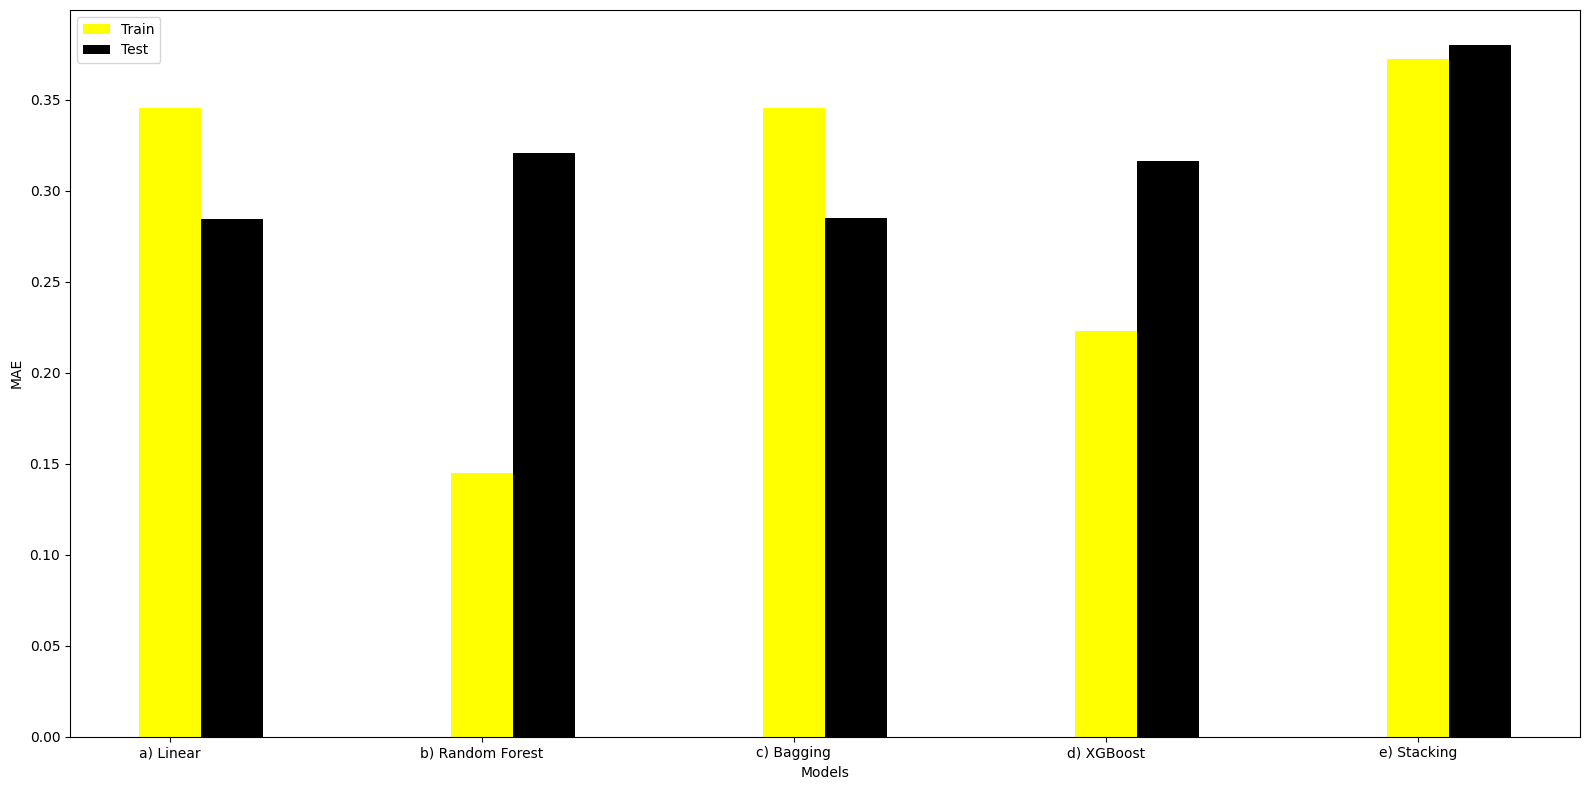

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

models = ["a) Linear", "b) Random Forest", "c) Bagging", "d) XGBoost", "e) Stacking"]

mae_train = [
    mean_absolute_error(y_train, y_pred_train_lr),
    mean_absolute_error(y_train, y_pred_train_rf),
    mean_absolute_error(y_train, y_pred_train_bag),
    mean_absolute_error(y_train, y_pred_train_xgb),
    mean_absolute_error(y_train, y_pred_train_stack)
]

mae_test = [
    mean_absolute_error(y_test, y_pred_test_lr),
    mean_absolute_error(y_test, y_pred_test_rf),
    mean_absolute_error(y_test, y_pred_test_bag),
    mean_absolute_error(y_test, y_pred_test_xgb),
    mean_absolute_error(y_test, y_pred_test_stack)
]

number_of_bars_in_x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(16,8))

plt.bar(number_of_bars_in_x, mae_train, width=width, color='yellow', label='Train')
plt.bar(number_of_bars_in_x + width, mae_test, width=width, color='black', label='Test')

plt.xticks(number_of_bars_in_x, models)
plt.ylabel("MAE")
plt.xlabel("Models")
plt.legend()
plt.tight_layout()
plt.show()